# Minta zh, bevezetés az adattudományba

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. feladat
1.1 Olvass be az iris.csv-t egy dataframe-be  
1.2 Módosítsd a dataframe oszlopai nevét, úgy hogy a pont helyett aláhúzás legyen Pl.: sepal.length --> sepal_length  
1.3 Dobd el azokat a sorokat, amikben van NaN  
1.4 Irattasd ki a 'variety' oszlop különböző értékeit. Minden érték csak egyszer szerepeljen  
1.5 Vizsgáld meg milyen korreláció van a Dataframe egyes oszolopai között. (df.corr) Irasd ki a legnagyobb korrelációt két különböző oszlop között  
1.6 Módosítsd a 'variety' értékét számokra. Setosa --> 0, Versicolor --> 1, Virginica --> 2  
1.7 Dobd el 'sepal.width' oszlopot  
1.8 Jelenítsd meg egy kördiagramon a 'variety' eloszlását, illetve jelenítsd meg labelben az osztályok nevét is.
1.9 A petal_length és petal_width-et jeleníts meg egy scatter plot-on. A osztályonként térjenek el a színek. Az X tengelyen a pental_width, az Y tengelyen pedig a pental_width jelenjen meg.

(numpy, pandas, matplotlib)

0.962757097050966 ['PetalWidthCm', 'PetalLengthCm']


C:\Users\hanus\AppData\Local\Temp\ipykernel_1892\745048798.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


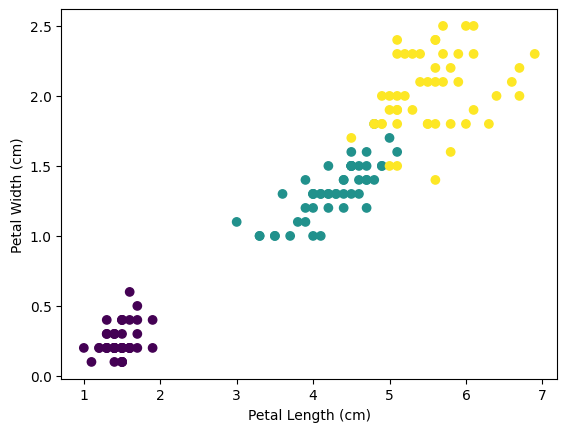

In [53]:
from sklearn.datasets import load_iris
data = pd.read_csv('Iris.csv', header=0, index_col=0)

data.dropna(axis='index', inplace=True)

#print(data['Species'].unique())

max_corr = 0
max_pair = [0, 0]

for c1 in data.columns[:-1]:
    for c2 in data.columns[:-1]:
        if c1 != c2:
            corr = data[c1].corr(data[c2])
            if abs(corr) > max_corr:
                max_corr = abs(corr)
                max_pair = [c1, c2]

print(max_corr, max_pair)

data['Species'].replace('Iris-setosa', 0, inplace=True)
data['Species'].replace('Iris-versicolor', 1, inplace=True)
data['Species'].replace('Iris-virginica', 2, inplace=True)

data.drop(columns=['SepalWidthCm'], axis='columns', inplace=True)

fig = plt.figure()

ax1 = fig.add_subplot()

ax1.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=data['Species'])
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')

fig.show()

## 2. feladat
2.1 A 'variety' legyen a cél függvény, a maradék oszlopok pedig a tanító halmaz  
2.2 Spliteld szét a dataframe-t. A tanító adathalmaz legyen 70%, a test pedig 30%. A random state pedig legyen 42  

(sklearn)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1])

## 3. feladat
3.1 Taníts fel egy decision tree-t  
3.2 Írtattasd ki a modell pontosságát  
3.3 Jelenítsd meg a decision tree-t matplotlib segítségével  

(sklearn)

In [70]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_preds = tree.predict(X_test)

print(accuracy_score(y_test, y_preds))



0.9210526315789473


## 4. feladat 
4.1 Értékeld a tanításodat 5 mondatban. Pl.: mivel lehet pontosítani a modellt, milyen más adatfeldolgozást lehetne csinálni.